In [ ]:
# Mercari Price Suggestion Challenge

# 중고 시장 내 가격 왜곡이 존재하는가?
# 동일 조건인데 가격편차가 큰 상품군 찾기 ex) “초과가격 vs 저평가 상품 분석”
# = 같은제품이라도 금액이 다른것이나, 컨디션에따른 금액 차이 등을 비교해보려 했으나 아이디어 고갈로 실패

# 제목에 다양한 정보가 포함되어 있으면 가격을 높게 받을 수 있을까?
# = 다양한 정보에 대한 기준을 어떻게 판별해야될지 고민

# 적절한 카테고리를 지정해주는게 가격에 영향이 있을까?
# = 카테고리나, 정보의 유무가 가격과 영향을 미치는지 확인.

# item_condition_id : 1~5 (1 = New, 5 = Poor)
# shipping : 0 = buyer pay, 1 = seller pay

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
train_df = pd.read_csv('train.tsv', sep='\t') #분석에 사용할 데이터.
test_df1 = pd.read_csv('test.tsv', sep='\t') #종속변수(y)값 예측하는 모델을 만든 후, 적용 할 데이터.

In [4]:
print(train_df.shape)

train_df.tail(20)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1482515,1482515,Pink Yankees hoodie,3,Women/Sweaters/Hooded,PINK,20.0,1,Size medium
1482516,1482516,New Bath & Body Works Scented Candle,1,Home/Home Décor/Candles & Holders,Bath & Body Works,15.0,0,Bath & Body Works Scented Candle Vanilla Bloss...
1482517,1482517,34D VS PINK red push up bra,3,Women/Underwear/Bras,PINK,11.0,0,To see all of the bras I have listed key in JB...
1482518,1482518,Brooches: lot of 5 assorted (1 Coro),3,Vintage & Collectibles/Jewelry/Brooch,NaN,10.0,1,3 appear to be VTG. The pink one is Coro.
1482519,1482519,SALE! FreeShip VS Logo Thong,1,Women/Underwear/Panties,PINK,9.0,1,"Brand new with tags, Victoria Secret logo thon..."
1482520,1482520,Bundle for BeSpa,3,Kids/Boys 0-24 Mos/One-Pieces,Gap,18.0,1,Bundle of Baby Gap's First Favorites 3-6 month...
1482521,1482521,Tarte Amazonian clay 12 hour blush,1,Beauty/Makeup/Face,Tarte,9.0,1,"Brand new, never used."
1482522,1482522,LG K7/Tribute 5 Hybrid Case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,8.0,1,"Perfect Design for LG Tribute 5 / LG K7, NOT f..."
1482523,1482523,NARS illuminator orgasm,3,Beauty/Makeup/Face,Nars,8.0,0,Still more than half left in this! Color is or...
1482524,1482524,Penn State Jogger Sweatpants,2,Women/Athletic Apparel/Tracksuits & Sweats,Nike,26.0,0,▪️NWOT ▪️Perfect Condition ▪️Barely been worn ...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [6]:
train_df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [7]:
train_df.isna().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

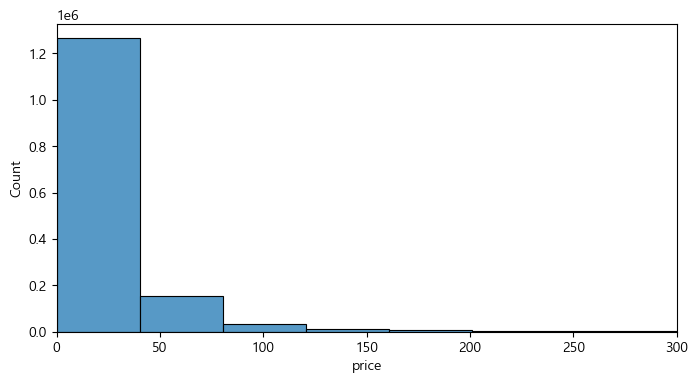

In [ ]:
## 1. 금액의 분포에 대해서 파악했음.

plt.figure(figsize=(8, 4))
sns.histplot(train_df['price'], bins=50)
plt.xlim(0, 300)
plt.show()


#대부분의 제품이 5000엔 이하로 몰려있으며 고가의 상품은 매우 극소수로 존재함.
#긴 꼬리형태 모델은 회귀모델에 적합하지 않음. 히스토그램 log로 변환.

In [9]:
train_df['log_price'] = np.log1p(train_df['price']) #log_price = in(price+1)

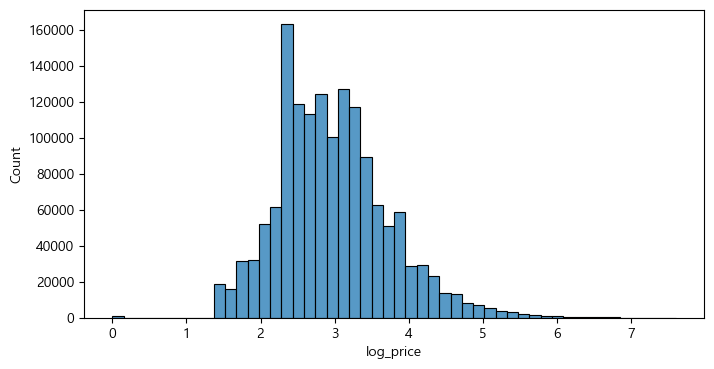

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['log_price'], bins=50)
plt.show()

#log_price = 2.5와 log_price = 3.5 사이에 위치하므로 11~32달러 사이의 금액이 많은 비중을 차지함을 알 수 있다.

In [ ]:
#1. 카테고리나 브랜드의 결측치에 따른 금액예상.  
# - 카테고리를 어떻게 나눌지에 대한 목표를 설정. -> 결측에 따른 카테고리를 만들고, 카테고리를 자동적으로 넣어준다. -> 카테고리의 결측에따라 금액이 차이가 있다면 유의미한 서비스일 수 있음.
# => 결론 : 결측에 따라 금액차이는 있다는것을 알아냈지만, 자동적으로 카테고리를 어떻게 넣어줘야할지 모르겠음.

#2. 카테고리를 men women kids로 나누고 여성이 거래가 많을것으로 예측 -> 예측결과가 맞다면, 중고옷매장등이나 중고장난감가게등과 협업하여 사업을 확장시킬 수 있음.
# - 이번 프로젝트에서는 이 부분은 마지막에 따로 개인적으로 진행해보기로 함.
# => 결론 : 키즈 뷰티 우먼이 70%를 차지하는것을 볼 수 있었음.

#3. 메루카리 시스템 자체가 거래가 많을수록 거래금액에 따른 수수료를 받음 // 현재 상품들은 대다수가 10~35달러정도의 가격을 형성중
# - 새로운 아이템 유입을 위해, 거래금액이 50달러 이상인 제품은 배송수수료를 제외해주는 서비스 등을 제공했을때 더 많은 이익이 생길 수 있다고 생각함. -> 특이사항 유무에 대해 확인할 필요가 있음.
# - or 10~35달러 사이의 제품을 많이 판매할 수록 이익이 생김 -> 
# => 결론 : 특이사항이 없었음.

In [12]:
# 카테고리를 "/" 를 기준으로 split한 값을 컬럼으로 생성

train_df['category_name'] = train_df['category_name'].fillna('Unknown')

train_df['category_split'] = train_df['category_name'].str.split('/')

train_df['category_first'] = train_df['category_split'].str[0]

train_df['category_second'] = train_df['category_split'].str[1]

train_df['category_third'] = train_df['category_split'].str[2]

train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,category_split,category_first,category_second,category_third
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,"[Men, Tops, T-shirts]",Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,"[Electronics, Computers & Tablets, Components ...",Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,"[Women, Tops & Blouses, Blouse]",Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,"[Home, Home Décor, Home Décor Accents]",Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,"[Women, Jewelry, Necklaces]",Women,Jewelry,Necklaces


In [28]:
train_df['category_first'] = train_df['category_first'].astype(str).str.lower()
train_df['category_second'] = train_df['category_second'].astype(str).str.lower()
train_df['category_third'] = train_df['category_third'].astype(str).str.lower()

train_df['category_first'] = train_df['category_first'].str.replace("'s", "", regex=False)
train_df['category_second'] = train_df['category_second'].str.replace("'s", "", regex=False)
train_df['category_third'] = train_df['category_third'].str.replace("'s", "", regex=False)

In [13]:
#각 속성별 컬럼의 갯수.
print(train_df['category_first'].nunique())

print(train_df['category_second'].nunique())

print(train_df['category_third'].nunique())

11
113
870


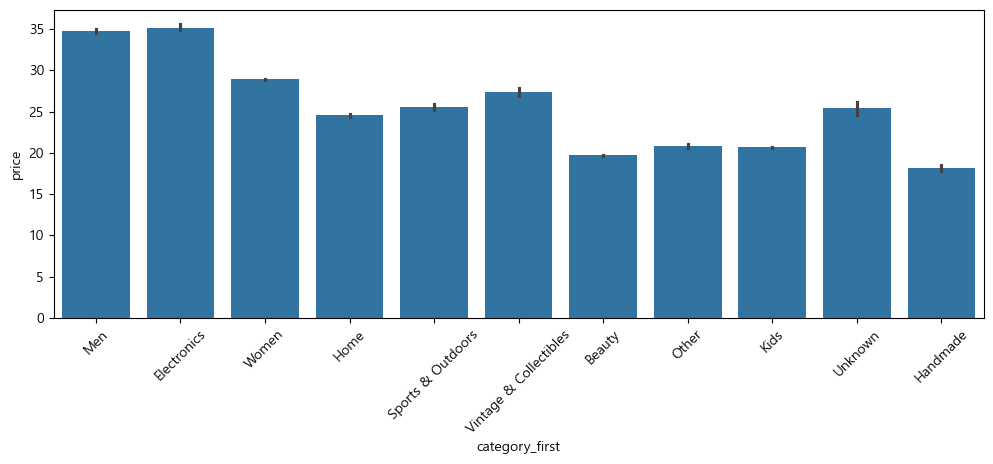

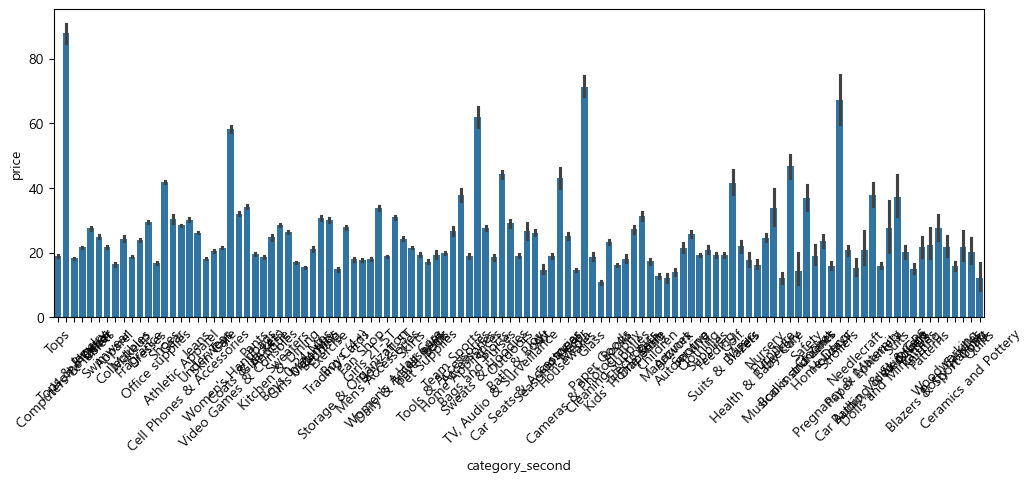

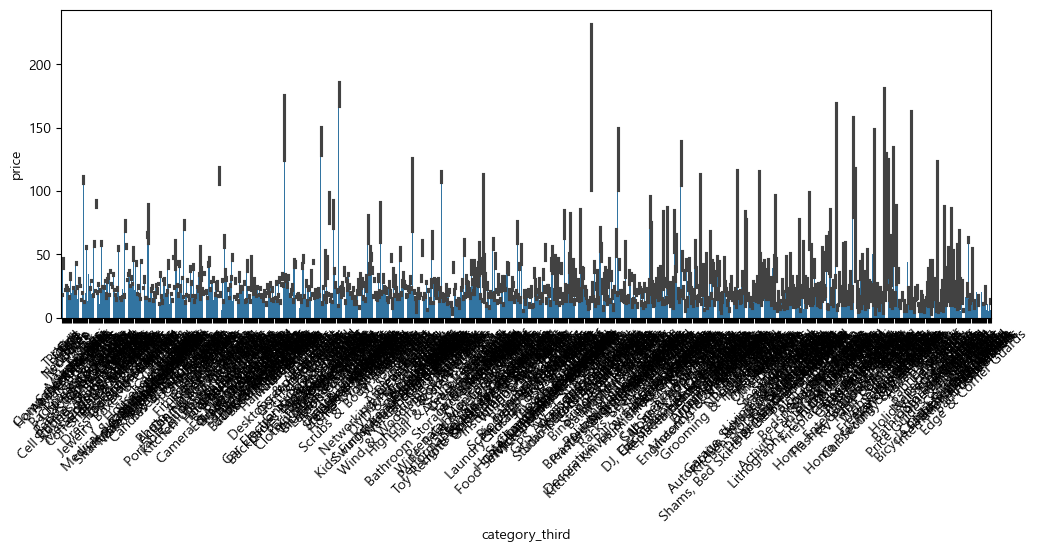

In [14]:
#카테고리별에 따른 금액 비교
plt.figure(figsize=(12,4))
sns.barplot(x=train_df['category_first'], y=train_df['price'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x=train_df['category_second'], y=train_df['price'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x=train_df['category_third'], y=train_df['price'])
plt.xticks(rotation=45)
plt.show()

In [42]:
#33달러 이상의 제품의 카테고리를 분류해봄.

high_price_df = train_df[train_df['price'] >= 33]

print(high_price_df.shape)
high_price_df.head()

(315613, 16)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,category_split,category_first,category_second,category_third,brand_missing,category_missing,description_len
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,"[Electronics, Computers & Tablets, Components ...",electronics,computers & tablets,components & parts,0,0,188
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,"[Home, Home Décor, Home Décor Accents]",home,home décor,home décor accents,1,0,173
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,"[Women, Jewelry, Necklaces]",women,jewelry,necklaces,1,0,41
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",4.094345,"[Women, Other, Other]",women,other,other,1,0,102
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,4.174387,"[Women, Swimwear, Two-Piece]",women,swimwear,two-piece,0,0,83


In [ ]:
high_price_df.groupby('category_first')['price'].mean().sort_values(ascending=False).head(20)

category_third
Tires & Wheels                 286.666667
Tag                            275.000000
Music                          260.500000
Laptops & Netbooks             220.622413
Handbag                        199.228916
Desktops & All-In-Ones         185.789474
Standard                       185.384615
Felted                         163.000000
Brass Instruments              162.300000
Cell Phones & Smartphones      152.384811
Digital Cameras                150.434280
Travel Systems                 147.716216
75 To 100 Years                144.357143
Laptop                         143.466667
Clutch                         139.125000
Band & Orchestra               137.500000
Air Conditioners               135.378378
Flashes & Flash Accessories    135.200000
Satchel                        133.997864
Vacuums & Floor Care           132.100775
Name: price, dtype: float64

In [22]:
high_price_df.groupby('category_second')['price'].mean().sort_values(ascending=False).head(20)

category_second
Computers & Tablets          141.154697
Cell Phones & Accessories    130.121970
Bags and Purses              121.112629
Cameras & Photography        113.023746
Strollers                    110.262745
Women's Handbags             101.257733
Golf                          87.176895
Home Appliances               81.644670
Musical instruments           81.245399
Patterns                      81.111111
TV, Audio & Surveillance      80.381891
Jewelry                       79.144797
Video Games & Consoles        78.739563
Safety                        76.379310
Men's Accessories             75.453161
Women's Accessories           74.757732
Books and Zines               74.500000
Car Seats & Accessories       74.424731
Crochet                       73.545455
Paper Goods                   72.505300
Name: price, dtype: float64

In [ ]:
high_price_df.groupby('category_third')['price'].mean().sort_values(ascending=False).head(20)

#상식적으로 비싼 카테고리는 비싸다. 유의미한 결과를 얻지는 못했음.

category_third
Tires & Wheels                 286.666667
Tag                            275.000000
Music                          260.500000
Laptops & Netbooks             220.622413
Handbag                        199.228916
Desktops & All-In-Ones         185.789474
Standard                       185.384615
Felted                         163.000000
Brass Instruments              162.300000
Cell Phones & Smartphones      152.384811
Digital Cameras                150.434280
Travel Systems                 147.716216
75 To 100 Years                144.357143
Laptop                         143.466667
Clutch                         139.125000
Band & Orchestra               137.500000
Air Conditioners               135.378378
Flashes & Flash Accessories    135.200000
Satchel                        133.997864
Vacuums & Floor Care           132.100775
Name: price, dtype: float64

In [ ]:
#brand/category 결측 여부를 컬럼으로 만들어 금액과 비교.

train_df['brand_missing'] = train_df['brand_name'].isna().astype(int)
train_df['category_missing'] = (train_df['category_name'] == 'Unknown').astype(int)

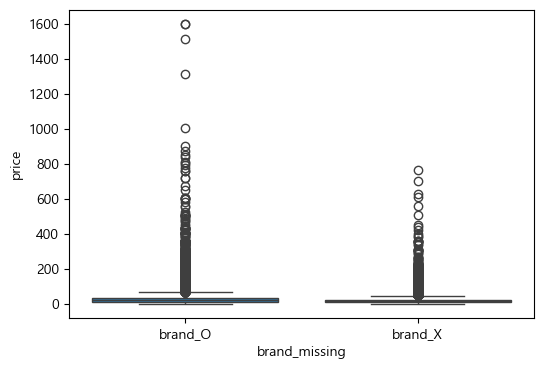

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='brand_missing', y='price', data=train_df.sample(50000, random_state=42))
plt.xticks([0,1], ['brand_O', 'brand_X'])
plt.show()

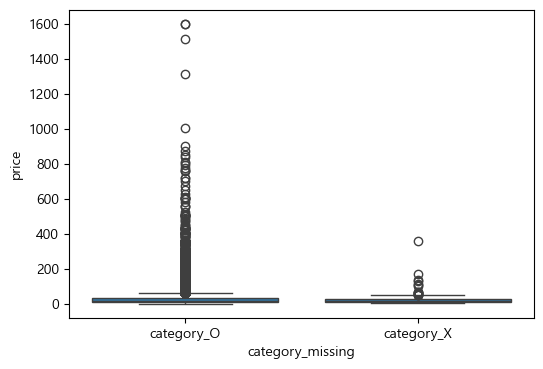

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='category_missing', y='price', data=train_df.sample(50000, random_state=42))
plt.xticks([0,1], ['category_O', 'category_X'])
plt.show()

#브랜드나 카테고리명이 있을때 더 큰 값들이 존재하며 유의미한 결과를 얻을 수 있었음.

In [33]:
print(train_df['category_first'].unique())
print(train_df['category_second'].unique())
print(train_df['category_third'].unique())

['men' 'electronics' 'women' 'home' 'sports & outdoors'
 'vintage & collectibles' 'beauty' 'other' 'kids' 'unknown' 'handmade']
['tops' 'computers & tablets' 'tops & blouses' 'home décor' 'jewelry'
 'other' 'swimwear' 'apparel' 'collectibles' 'makeup' 'fragrance'
 'dresses' 'office supplies' 'shoes' 'gear' 'athletic apparel'
 'cell phones & accessories' 'jeans' 'underwear' 'skin care' 'toys'
 'women handbags' 'video games & consoles' 'coats & jackets' 'pants'
 'girls (4+)' 'antique' 'kitchen & dining' 'sweaters' 'boys 0-24 mos'
 'girls 0-24 mos' 'maternity' 'bedding' 'exercise' 'trading cards'
 'boys (4+)' 'storage & organization' 'fan shop' 'girls 2t-5t'
 'men accessories' 'boys 2t-5t' 'women accessories' 'daily & travel items'
 'nan' 'skirts' 'hair care' 'pet supplies' 'book' 'tools & accessories'
 'team sports' 'home appliances' 'accessories' 'bags and purses'
 'sweats & hoodies' 'shorts' 'tv, audio & surveillance' 'outdoors'
 'bath & body' 'car seats & accessories' 'toy' 'art' 'sea

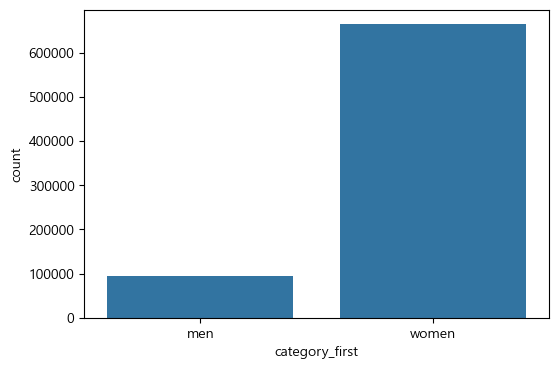

category_first
men      34.708614
women    28.885496
Name: price, dtype: float64

In [ ]:
#첫번째 카테고리를 남성과 여성기준으로 나눠서 확인.

gender_df = train_df[train_df['category_first'].isin(['women', 'men'])]

plt.figure(figsize=(6,4))
sns.countplot(x='category_first', data=gender_df)
plt.show()

gender_df.groupby('category_first')['price'].mean()

#유의미한 결과가 나지 않음.

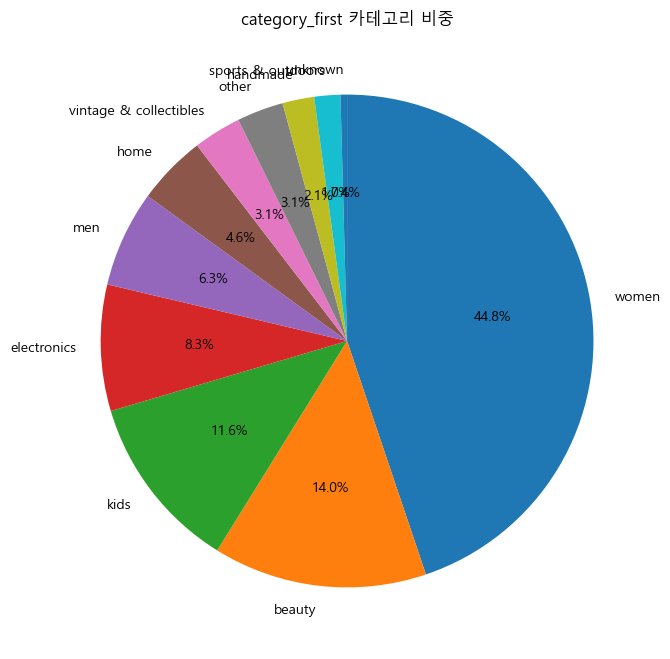

In [ ]:
# category_first 비중 계산

cat_first_ratio = train_df['category_first'].value_counts()  # 상위 10개만

plt.figure(figsize=(8,8))
plt.pie(
    cat_first_ratio.values,
    labels=cat_first_ratio.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('category_first 카테고리 비중')
plt.show()

#kids, beauty, women이 70% 비중차지.

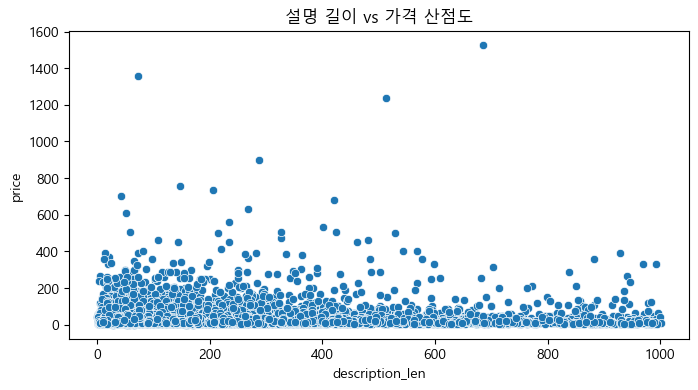

In [ ]:
#설명의 길이가 가격의 분포와 연관이 있는지

train_df['description_len'] = train_df['item_description'].fillna('').str.len()

plt.figure(figsize=(8,4))
sns.scatterplot(x='description_len', y='price', data=train_df.sample(20000))
plt.show()

#크게 연관없기에 다른 방안 찾아야함.

In [ ]:
#분석완료

#속성(x)로 종속변수(y)를 예측해야함.
#y = log_price , 로그로 변환한 price
#x = item_condition_id, shipping, description_len, brand_missing, category_missing, category_first